In [69]:

"""
Created on Fri Mar 26 10:36:06 2021

@author: patricioreyesgomez
"""

"""
Patricio Reyes Gomez and Bill (Guanbo) Liu
DS 2500 Final Project
"""
import collections
import pandas as pd
import wordcloud as wc
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
import re

In [72]:
df = pd.read_csv("nms_reviews.csv", index_col=0)

In [73]:
df

,steamid,num_games_owned,num_reviews,playtime_forever,playtime_at_review,review,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
0,76561198392543189,54,2,7345,7335,"During the disastrous launch of No Man’s Sky, ...",1,589,4,0.950451,0,True,False,False
1,76561198057055742,117,15,92,88,"To be honest, It's not my style of game.\nBut ...",1,141,1,0.909962,0,True,False,False
2,76561198107346352,96,8,3703,3703,I don't think anybody would deny that Hello Ga...,0,0,13,0.736210,37,True,False,False
3,76561198202701980,146,2,8890,8890,This game has more long-term support than most...,1,38,1,0.710257,0,True,False,False
4,76561198079365268,93,3,13758,9750,i found a giant weenis monster\ni rode the gia...,1,30,34,0.649442,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,76561198080739218,964,2,6072,6042,"THE PROS\n1. the 1st time experience, the < 10...",0,0,0,0.518828,0,True,False,False
531,76561198045785427,286,5,7250,7114,This game is only as good or bad as you make it.,1,1,0,0.518519,0,True,False,False
532,76561198084100039,37,3,2200,266,This game is great if you want a space explora...,1,1,0,0.518519,0,True,False,False
533,76561198035655467,230,34,3952,3952,No other game has been getting so many BIG gam...,1,1,0,0.518072,0,True,False,False


In [74]:
def wordcloud(text):
    """
    

    Parameters
    ----------
    One string

    Function: Creates a word cloud for text

    Returns
    -------
    No return

    """

    
    cloud = wc.WordCloud().generate(text)
    plt.imshow(cloud)
    plt.axis(False)
    
def sentiment_score(text):
    """ Function: sentiment_score
    Parameters: string of text
    Returns: average sentiment score of the words in a string/text
    """
    
    total = 0
    if len(text) > 0:
        text = text.strip().split()
        for word in text:
            polarity = TextBlob(word).sentiment.polarity
            total += polarity
            
    return round(total / len(text), 5)

    
def cleanphrase(words):
    ''' Function: clean_speed
        Parameters: a string
        Returns: the string split into a list, but lowercased and 
                 with punctuation removed,
                 and stopwords removed
    '''
    clean_words = []
    for word in words.split():
        word = re.sub("[^\w\s]", "", word)
        word = word.lower()
        if word not in STOP_WORDS:
            clean_words.append(word)
    
    line = ' '.join(clean_words)
    return line

def popular_words(text, length, Type = "string"):
    """
    

    Parameters
    ----------
    length : how many popular words you want returned
    text : string we want to find popular words of.\

    Returns
    -------
    (Length) most popular words in text

    """
    new_text = ''
    if Type == "list":
        for i in text:
            new_text += i + ' '
        text = new_text
    
    
    text = text.lower().split()
    clean_text = []
    count = 0
    for word in text:
        count += 1
        if word not in STOP_WORDS:
             clean_text.append(word)
    counter = Counter(clean_text)
    most_pop = counter.most_common(length)
    
    return most_pop

def overlap(text1, text2):
    """
    

    Parameters
    ----------
    text1 : first text you want to find overlap with second
    text2 : second text

    Returns
    -------
    int
        the number of popular words they share in common

    """
    
    popwords1 = popular_words(text1, 100)
    #creates a list of the words
    words1 = [popwords1[i][0] for i in range(len(popwords1))]
        
    popwords2 = popular_words(text2, 100)
    #list of the words
    words2 = [popwords2[i][0] for i in range(len(popwords2))]
    
    #finds words in common by checking if they're in each other's lists
    overlap = [word for word in words1 if word in words2]
        
    return int(len(overlap))


def ngrams(text, n=2):

    """
    

    Parameters
    ----------
    text : TYPE
        DESCRIPTION.
    n :
        ngrams we need

    Returns
    -------
    A list of words for the text divided up by the ngram parameters entered

    """
    
    return zip(*[text[i:] for i in range(n)])

[('not', 200), ('can', 199), ('if', 196), ('have', 190), ('more', 187), ('was', 174), ('all', 174), ('so', 161), ('like', 153), ('just', 148), ('has', 146), ('get', 140), ('your', 136), ('space', 124), ('good', 121), ('when', 112), ('one', 108), ('time', 108), ('fun', 105), ('me', 100), ('after', 96), ('really', 95), ('much', 90), ('now', 84), ('what', 84), ('new', 82), ('years', 81), ('hours', 77), ('exploration', 74), ('updates', 74), ('than', 74), ('base', 73), ('up', 71), ('would', 69), ('first', 69), ('things', 68), ('which', 67), ('dont', 65), ('planets', 65), ('great', 65), ('want', 63), ('content', 62), ('way', 61), ('because', 60), ('only', 60), ('update', 59), ('had', 59), ('then', 58), ('back', 58), ('launch', 57)]


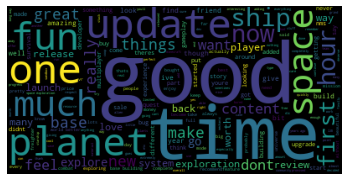

In [77]:
STOP_WORDS = ['but', 'again', 'there', 'about', 'once', 'during', 'out',
'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do',
'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is',
'am', 'or', 'who', 'as', 'will', 'and', 'the', 'from', 'at', 'let',
'and', 'the', 'of', 'to', 'is', 'are', 'their', 'from', 'a', 'in', 'that'
, 'this', 'it', 'on', 'by', 'i', 'still', 'thing', 'even', 'lot', 'see','game','games',
'you','my','play','played','playing','no','mans','sky','hello']

text = ""

for i in range(len(df)):
    review = df.loc[i, "review"]
    text = text + str(review)
cleantext = cleanphrase(text)

cloud = wordcloud(cleantext)
total_ss_score = sentiment_score(cleantext)
overall_most_pop = popular_words(cleantext, 50)
print(overall_most_pop)

pos_text = ''
pos_reviews_counter = 0
neg_text = ''
neg_reviews_counter = 0
for i in range(len(df)):
    review = str(df.loc[i, "review"])
    ss = sentiment_score(review)
    if ss >= 0:
        pos_text = pos_text + review
        pos_reviews_counter += 1
    else:
        neg_text = neg_text + review
        neg_reviews_counter += 1

clean_pos_text = cleanphrase(pos_text)
clena_neg_text = cleanphrase(neg_text)

Number of negative reviews: 118/535 (22.05607476635514%)
Word Cloud generated for negative reviews


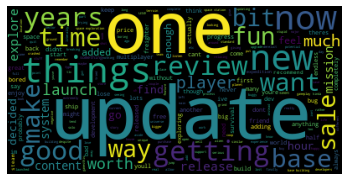

In [78]:
total_ss_neg = sentiment_score(clena_neg_text)
print("Number of negative reviews: " + str(neg_reviews_counter) + "/" + str(len(df)) + " (" + str(neg_reviews_counter/len(df) * 100) + "%)")
print("Word Cloud generated for negative reviews")
cloud_neg = wordcloud(clena_neg_text)

Number of positive reviews: 417/535 (77.94392523364486%)
Word Cloud generated for positive reviews


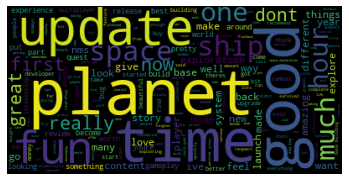

In [79]:
total_ss_pos = sentiment_score(clean_pos_text)
cloud_pos = wordcloud(clean_pos_text)
print("Number of positive reviews: " + str(pos_reviews_counter) + "/" + str(len(df)) + " (" + str(pos_reviews_counter/len(df) * 100) + "%)")
print("Word Cloud generated for positive reviews")

In [80]:
ngram_counts = collections.Counter(ngrams(cleantext.split(), 2))
ngram_counts.most_common(10)

[(('so', 'much'), 31),
 (('base', 'building'), 29),
 (('space', 'exploration'), 23),
 (('if', 'youre'), 21),
 (('if', 'like'), 21),
 (('years', 'ago'), 20),
 (('has', 'come'), 19),
 (('more', 'than'), 19),
 (('if', 'want'), 18),
 (('so', 'many'), 17)]

In [81]:
ngram_counts = collections.Counter(ngrams(cleantext.split(), 3))
ngram_counts.most_common(10)

[(('has', 'come', 'long'), 13),
 (('come', 'long', 'way'), 12),
 (('ding', 'ding', 'ding'), 12),
 (('if', 'youre', 'looking'), 8),
 (('so', 'much', 'so'), 7),
 (('long', 'way', 'since'), 7),
 (('5', 'years', 'later'), 6),
 (('more', 'explore', 'more'), 6),
 (('if', 'like', 'building'), 6),
 (('so', 'much', 'more'), 5)]